In [3]:
import numpy as np
import matplotlib.pyplot as plt

Se calculará el dimensionamiento de una estructura de la forma: 
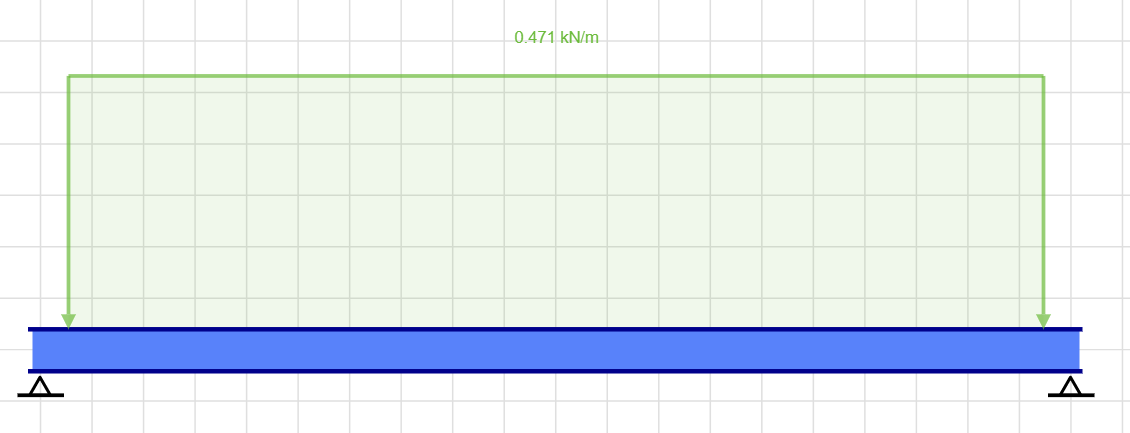

Tanto para un perfil UPN como un I

In [41]:
#Peso (kg)
P = 1000

In [42]:
#Largo (mm)
L = 4490 #Entre cáncamos
L1 = 4250

In [43]:
#Peso por unidad de longitud (kg/mm)
q = P/L1
q

0.23529411764705882

In [44]:
# Planteo de sistema de ecuaciones
A = np.array([[1, 1],[0, 1]])
B = np.array([P,P*.5])
R= np.linalg.solve(A,B) # Esfuerzos Reactivos
R * 9

array([4500., 4500.])

# Momento flector y de corte
## Momento flector

In [45]:
x = np.linspace(0, L)
y = np.piecewise(x, [ (x >= 0) & (x <= (L-L1)/2), (x >= (L-L1)/2) & (x <= L - (L-L1)/2),(x >= L - (L-L1)/2) & (x <= L)],
                 [lambda x: R[0]* x, lambda x: R[0] * x - (q/2) * x * (x - (L-L1)/2),lambda x: (R[0] - P/2) * x])

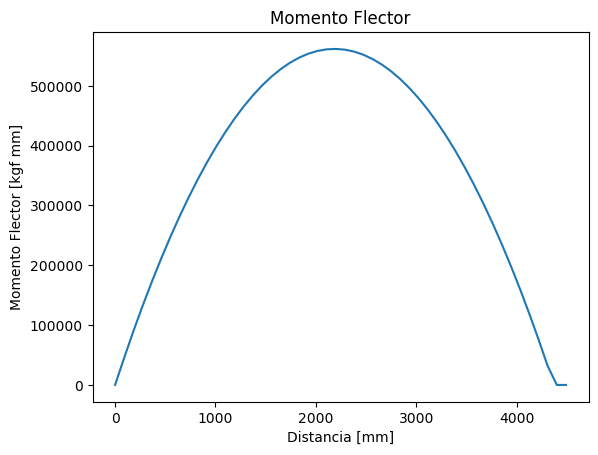

<Figure size 640x480 with 0 Axes>

In [46]:
fig, mf = plt.subplots()
mf.plot(x, y)
mf.set_title('Momento Flector')
mf.set_xlabel('Distancia [mm]')
mf.set_ylabel('Momento Flector [kgf mm]')

plt.show()
plt.savefig('momento flector.jpg')

In [47]:
Mmax = max(y) * 9.8/10
Mmax # N cm

550416.8643457384

## Momento de corte

In [48]:
x2 = np.linspace(0, L)
y2 = np.piecewise(x, [ (x >= 0) & (x <= (L-L1)/2), (x >= (L-L1)/2) & (x <= L - (L-L1)/2),(x >= L - (L-L1)/2) & (x <= L)],
                 [ R[0] , lambda x: R[0]  - q * (x - (L-L1)/2), - R[0]])

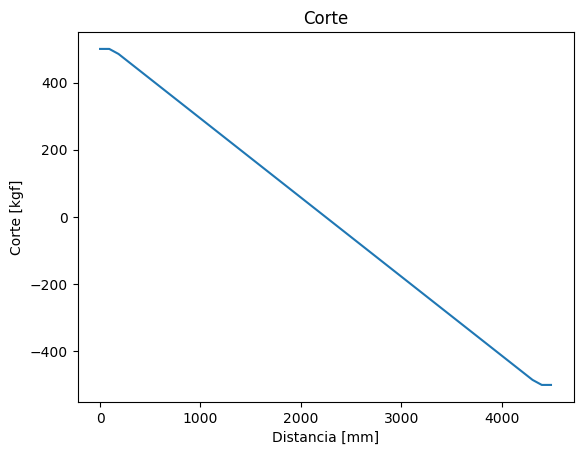

In [49]:
fig2, Q = plt.subplots()
Q.plot(x2, y2)
Q.set_title('Corte')
Q.set_xlabel('Distancia [mm]')
Q.set_ylabel('Corte [kgf]')

plt.show
plt.savefig('momento corte.jpg')

In [50]:
Qmax = max(y2) * 9.8
Qmax

4900.0

De los graficos podemos ver de corroborar dos puntos: 

> Máximo momento

> Máximo corte

# Cálculo de momento flector

> $M_{max} = 2201667.4573829537  \textrm{N cm}$

> $\sigma_{adm} = 240  \textrm{Mpa}$

### Perfil IPN 

> $S_{y} = 354 cm^3$

> $\sigma_{IPN} = M_{max}/S_{y} = 31.09699798563494 MPa$


Con $ \sigma_{IPN} = M_{max}/S_{y} = 31.09699798563494 MPa $

Obtengo $\sigma_{adm} / \sigma_{IPN} = 7.71$ por lo cual corrobora

### Perfil UPN

> $S_{y} = 300 cm^3$

Con $ \sigma_{UPN} = M_{max}/S_{y} = 36.69445762304923 MPa $

Obtengo $\sigma_{adm} / \sigma_{UPN} = 6.6$ por lo cual corrobora

In [51]:
S_UPN = 300
Sigma_UPN = Mmax / S_UPN * 0.01
Sigma_UPN #MPa

18.347228811524616

In [52]:
sigma_adm/Sigma_UPN

13.080994545031594

In [53]:
S_IPN = 354
Sigma_IPN = Mmax / S_IPN * 0.01
Sigma_IPN #MPa

15.54849899281747

In [54]:
sigma_adm = 240
sigma_adm/Sigma_IPN

15.435573563137282

# Cálculo de momento de corte

## Datos

> $Q_{max} = 19600 N $

## Perfil UPN

> $A = 42.3 cm2$

> $\tau_{xy} = 2 Q_{max}/A = 2.3167848699763596 Mpa$

Usando H-M-H

$ \sigma_{eq} = \sqrt{\sigma_{x}^2 + \sigma_{y}^2 - \sigma_{x} \sigma_{y} + 3 \tau_{xy}^2} $

Con $ \sigma_{eq} = 4.0127891050059095 MPa $

Obtengo $\sigma_{adm} / \sigma_{eq} = 59.8 $ por lo cual corrobora

## Perfil IPN

> $A = 46.1 cm2$

> $\tau_{xy} = 2 Q_{max}/A = 2.125813449023861 Mpa$

Con $ \sigma_{eq} = 3.6820169011225587 MPa $

Obtengo $\sigma_{adm} / \sigma_{eq} = 65.2 $ por lo cual corrobora


In [55]:
A = 42.3
tau_UPN = Qmax * 2/A * 0.01
tau_UPN

2.3167848699763596

In [56]:
sig_UPN = np.sqrt(3) * tau_UPN
sig_UPN

4.0127891050059095

In [57]:
sigma_adm / sig_UPN

59.80877482462328

In [58]:
A1 = 46.1
tau_IPN = Qmax * 2/A1 * 0.01
tau_IPN

2.125813449023861

Usando H-M-H

$ \sigma_{eq} = \sqrt{\sigma_{x}^2 + \sigma_{y}^2 - \sigma_{x} \sigma_{y} + 3 \tau_{xy}^2} $

In [59]:
sig_IPN = np.sqrt(3) * tau_IPN
sig_IPN

3.6820169011225587

In [60]:
sigma_adm / sig_IPN

65.18166712565326

Con $ \sigma_{eq} = 62.19399597126988 MPa $

Obtengo $\sigma_{adm} / \sigma_{eq} = 14.95$ por lo cual corrobora